# LINEAR REGRESSION

### What is it?
An algorithm to model a linear relationship between 2 quantitative variables. The most commonly used approach is called Least Squares Regression in which the vertical distance from the regression line to the data point is minimized.


### When to use it?
Use of linear regression is appropriate when the following conditions are met.
1. There are 2 quantitative variables whose scatterplot shows a general linear shape.
2. Data is free of clear outliers.
3. Residuals are independent. Can be checked by looking to see if the redidual plot has a random pattern.
4. Residual plot does not show a cone or triangle shape, meaning the variability is not growing or shrinking as the independent variable increases.
5. For every x-value (explanatory variable), the y-values (response variable) are approximately normal - i.e. symmetric and single peaked.


### Limitations?
1. Only works on data in which a linear relationship exists.
2. Only looks at the mean of the response variable. For example, if you were using the model to predict an outcome for an input of 3, the model would give you the predicted average for all outcomes at 3. It does not say anything about variance. 
3. All the conditions above must be met.
    - Model is sensitive to outliers.
    - Must have independent observations.

#### For definition of statistics terms visit: http://www.nedarc.org/statisticalHelp/statisticalTermsDictionary.html
#### For definitions of machine learning terms visit: https://developers.google.com/machine-learning/glossary/



In [1]:
#Bring in dependencies
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Import the data
temp = pd.read_csv('DataSets/temp.csv')
temp.head()
temp.dtypes

Unnamed: 0                int64
title                    object
budget                    int64
revenue                   int64
release_date             object
runtime                   int64
original_language        object
production_companies     object
production_countries     object
genres                   object
spoken_languages         object
id                        int64
imdb_id                  object
vote_average            float64
vote_count                int64
dtype: object

#Linear Regression Revenue Independent and Vote Average as Dependent

In [3]:
#Define X as revenue and y as vote_average
X = temp[["revenue"]]
y = temp[["vote_average"]]
print(X)
print(X.shape, y.shape)
y

        revenue
0      42930462
1     137551594
2      24188922
3      53898845
4      36993168
5     112483764
6      71154592
7     228738393
8      82800000
9      15071514
10    108609310
11     51416464
12    424988211
13      2541554
14    351040419
15            6
16     74208267
17     60740827
18     85416905
19       748453
20      2037545
21     85446075
22      3500000
23    413106170
24     27645491
25     45465299
26     40452643
27     28128670
28    125728258
29    142337240
...         ...
3216    9000000
3217   11000000
3218   28262574
3219  775398007
3220    8500000
3221  235860116
3222   25000000
3223  272742922
3224   14661007
3225  327311859
3226   39723096
3227   23341568
3228  538400000
3229   36764313
3230   23875127
3231    5000000
3232    1000000
3233      19181
3234  677945399
3235  284600000
3236   46836394
3237  321365567
3238  213928762
3239   47542841
3240   32000000
3241   13092000
3242  108981275
3243  245066411
3244   28341469
3245    4978922

[3246 r

,vote_average
0,5.8
1,6.2
2,6.5
3,6.2
4,5.4
5,4.9
6,5.1
7,5.2
8,5.6
9,5.7


In [4]:
#Split data into traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,revenue
1971,4836637
2779,6000000
1650,3878993
2607,55707411
2702,5849647


In [5]:
#Get Normalized Data

#X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

#normalize skewed X data and move peak to be at zero
X_train_log = np.log1p(X_train)-17.5
X_test_log = np.log1p(X_test)-17.5
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)



<function matplotlib.pyplot.show(*args, **kw)>

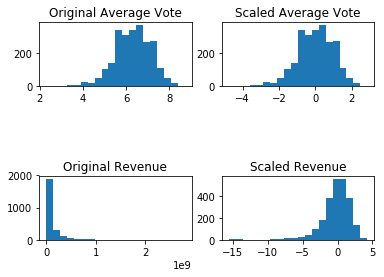

In [6]:
#Look at data

plt.subplot(321)
plt.hist(y_train.values, bins=20)
plt.title("Original Average Vote")

plt.subplot(322)
plt.hist(y_train_scaled, bins=20)
plt.title("Scaled Average Vote")

plt.subplot(325)
plt.hist(X_train.values, bins=20)
plt.title("Original Revenue")

plt.subplot(326)
plt.hist(X_train_log.values, bins=20)
plt.title("Scaled Revenue")


plt.show


**********Original Data*************
---------- Train Data  -------------
MSE: 0.6842024323361445, R2: 0.032111552097285445
---------- Test Data  -------------
MSE: 0.7217356339544095, R2: 0.008419634956486899
************************************

**********Normalized Data*************
---------- Train Data  -------------
MSE: 0.9778794220024029, R2: 0.022120577997597146
---------- Test Data  -------------
MSE: 1.0348395235099823, R2: -0.005037080068204247
************************************


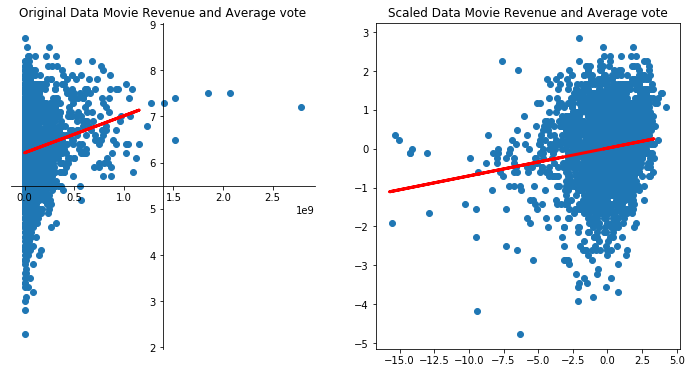

In [7]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train_log, y_train_scaled)

# Make predictions using the testing set
y_pred = model1.predict(X_test)
y_train_pred = model1.predict(X_train)

y_pred_scaled = model2.predict(X_test_log)
y_train_pred_scaled = model2.predict(X_train_log)

print('**********Original Data*************')
print('---------- Train Data  -------------')
MSE = mean_squared_error(y_train, y_train_pred)
r2 = model1.score(X_train, y_train)
print(f"MSE: {MSE}, R2: {r2}")
print('---------- Test Data  -------------')
MSE = mean_squared_error(y_test, y_pred)
r2 = model1.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")
print('************************************')

print()


print('**********Normalized Data*************')
print('---------- Train Data  -------------')
MSE = mean_squared_error(y_train_scaled, y_train_pred_scaled)
r2 = model2.score(X_train_log, y_train_scaled)
print(f"MSE: {MSE}, R2: {r2}")
print('---------- Test Data  -------------')
MSE = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = model2.score(X_test_log, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")
print('************************************')


# Plot outputs

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data Movie Revenue and Average vote")
axes2.set_title("Scaled Data Movie Revenue and Average vote")

maxx = X_train["revenue"].max()
maxy = y_train.max()


def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes1)

axes1.scatter(X_train["revenue"], y_train)
axes2.scatter(X_train_log["revenue"], y_train_scaled)


axes1.plot(X_test, y_pred, color='red', linewidth=3)
axes2.plot(X_test_log, y_pred_scaled, color='red', linewidth=3)

plt.show()

#Linear Regression Vote Average as Independent and Revenue as Dependent

In [8]:
#Switch Independent and Dependent Variable

vote_X_train = y_train
vote_X_test = y_test
vote_X_test_scaled = y_test_scaled
vote_X_train_scaled = y_train_scaled

rev_y_train = X_train
rev_y_test = X_test
rev_y_test_scaled = X_test_log
rev_y_train_scaled = X_train_log


**********Original Data*************
---------- Train Data  -------------
MSE: 3.4274966635625264e+16, R2: 0.032111552097285445
---------- Test Data  -------------
MSE: 2.031256381087652e+16, R2: 0.006429564117812369
************************************

**********Normalized Data*************
---------- Train Data  -------------
MSE: 4.243365128571391, R2: 0.022120577997597146
---------- Test Data  -------------
MSE: 4.2700511379288795, R2: 0.005923469664443237
************************************


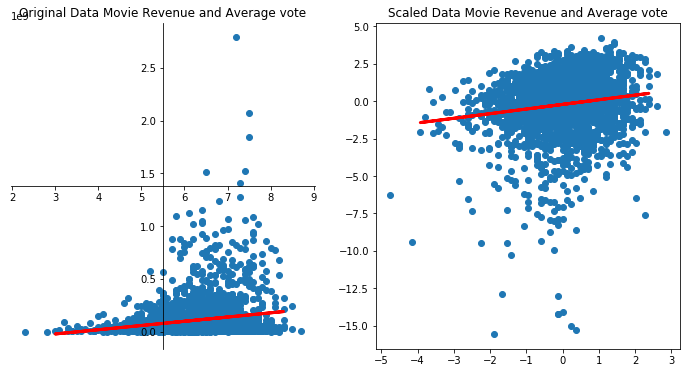

In [9]:
model1 = LinearRegression()
model1.fit(vote_X_train, rev_y_train)

model2 = LinearRegression()
model2.fit(vote_X_train_scaled, rev_y_train_scaled)

# Make predictions using the testing set
rev_y_pred = model1.predict(vote_X_test)
rev_y_train_pred = model1.predict(vote_X_train)

rev_y_pred_scaled = model2.predict(vote_X_test_scaled)
rev_y_train_pred_scaled = model2.predict(vote_X_train_scaled)

print('**********Original Data*************')
print('---------- Train Data  -------------')
MSE = mean_squared_error(rev_y_train, rev_y_train_pred)
r2 = model1.score(vote_X_train, rev_y_train)
print(f"MSE: {MSE}, R2: {r2}")
print('---------- Test Data  -------------')
MSE = mean_squared_error(rev_y_test, rev_y_pred)
r2 = model1.score(vote_X_test, rev_y_test)
print(f"MSE: {MSE}, R2: {r2}")
print('************************************')

print()


print('**********Normalized Data*************')
print('---------- Train Data  -------------')
MSE = mean_squared_error(rev_y_train_scaled, rev_y_train_pred_scaled)
r2 = model2.score(vote_X_train_scaled, rev_y_train_scaled)
print(f"MSE: {MSE}, R2: {r2}")
print('---------- Test Data  -------------')
MSE = mean_squared_error(rev_y_test_scaled, rev_y_pred_scaled)
r2 = model2.score(vote_X_test_scaled, rev_y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")
print('************************************')


# Plot outputs

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data Movie Revenue and Average vote")
axes2.set_title("Scaled Data Movie Revenue and Average vote")

maxx = vote_X_train["vote_average"].max()
maxy = rev_y_train.max()


def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes1)

axes1.scatter(vote_X_train["vote_average"], rev_y_train)
axes2.scatter(vote_X_train_scaled, rev_y_train_scaled)


axes1.plot(vote_X_test, rev_y_pred, color='red', linewidth=3)
axes2.plot(vote_X_test_scaled, rev_y_pred_scaled, color='red', linewidth=3)

plt.show()

In [10]:
#Linear Regression Runtime explanatory and Budget response

In [11]:
# delete entries with zero budget
temp_w_budget_and_runtime = temp[temp.budget != 0]
temp_w_budget_and_runtime = temp_w_budget_and_runtime[temp_w_budget_and_runtime.runtime !=0]
temp_w_budget_and_runtime

#Define X as revenue and y as vote_average
X = temp_w_budget[["runtime"]]
y = temp_w_budget[["budget"]]
print(X)
print(X.shape, y.shape)

NameError: name 'temp_w_budget' is not defined

In [ ]:
#Split data into traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

In [ ]:
#Look at data

plt.subplot(321)
plt.hist(y_train.values, bins=20)
plt.title("Original Average Vote")

#plt.subplot(322)
#plt.hist(y_train_scaled, bins=20)
#plt.title("Scaled Average Vote")

plt.subplot(325)
plt.hist(X_train.values, bins=20)
plt.title("Original Revenue")

#plt.subplot(326)
#plt.hist(X_train_log.values, bins=20)
#plt.title("Scaled Revenue")


plt.show


In [ ]:
#Get Normalized Data


X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)



In [ ]:
#Look at data

plt.subplot(321)
plt.hist(y_train.values, bins=20)
plt.title("Original budget")

plt.subplot(322)
plt.hist(y_train_log.values, bins=20)
plt.title("Scaled budget")

plt.subplot(325)
plt.hist(X_train.values, bins=20)
plt.title("Original runtime")

plt.subplot(326)
plt.hist(X_train_scaled, bins=20)
plt.title("Scaled runtime")


plt.show


In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train_log)

# Make predictions using the testing set
y_pred = model1.predict(X_test)
y_pred_log = model2.predict(X_test_scaled)

print('**********Original Data*************')
MSE = mean_squared_error(y_test, y_pred)
r2 = model1.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

print('**********Normalized Data*************')
MSE = mean_squared_error(y_test_log, y_pred_log)
r2 = model2.score(X_test_scaled, y_test_log)

print(f"MSE: {MSE}, R2: {r2}")

# Plot outputs

fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data Movie Revenue and Average vote")
axes2.set_title("Scaled Data Movie Revenue and Average vote")

maxx = X_train["runtime"].max()
maxy = y_train.max()


def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["runtime"], y_train)
axes2.scatter(X_train_scaled, y_train_log)


axes1.plot(X_test, y_pred, color='red', linewidth=3)
axes2.plot(X_test_scaled, y_pred_log, color='red', linewidth=3)

plt.show()